<div class="markdown-google-sans">

## **Selamat Datang!**
</div>

Dokumen ini mengandung tugas seleksi masuk asisten IRK.

Berikut langkah yang harus dilakukan untuk menggunakan program:
1. !PENTING! Upload file input.txt kepada bagian `files` google colab
2. Tekan tombol-tombol yang keluar pada layar, semestinya GUI sudah user-friendly enough sehingga straightforward untuk dipakai :D


In [25]:
import networkx as nx
import matplotlib.pyplot as plt


def prompt_file():
    file_path = input("Enter the path to the input file: ")
    with open(file_path, "r") as file:
        lines = file.readlines()

    graph = nx.Graph()
    for i, line in enumerate(lines):
        weights = list(map(int, line.split()))
        for j, weight in enumerate(weights):
            if weight != 0:
                graph.add_edge(i, j, weight=weight)

    return graph


def plot_graph(graph, pos, title):
    edge_labels = nx.get_edge_attributes(graph, "weight")
    node_labels = {i: i for i in graph.nodes()}

    plt.figure(figsize=(12, 8))
    nx.draw_networkx(graph, pos, with_labels=False, node_size=500)
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=12, font_color="white")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10)
    plt.axis("off")
    plt.title(title)
    plt.show()


# Usage example
graph = prompt_file()

Enter the path to the input file: input.txt


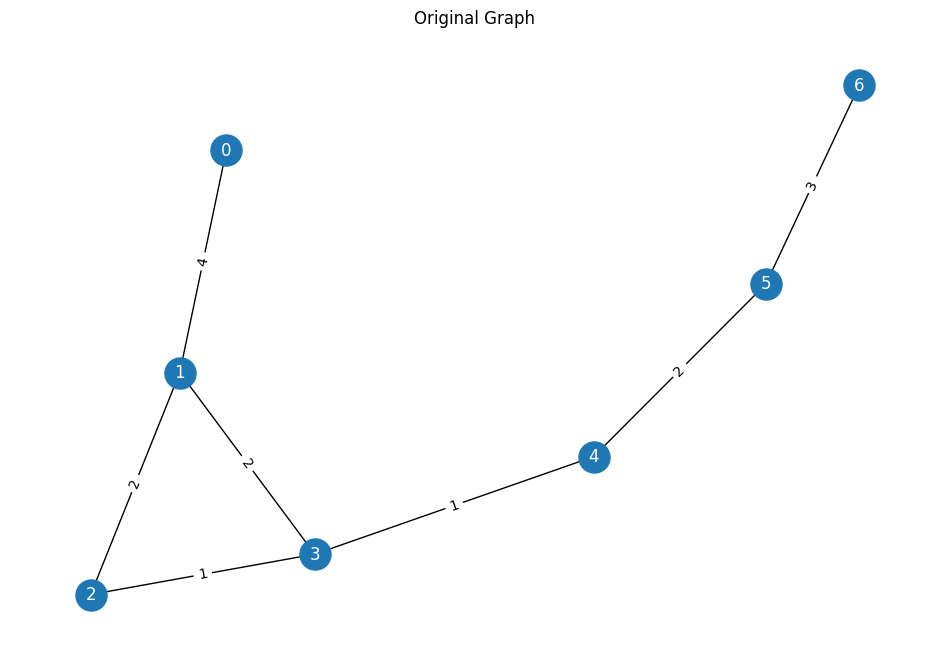

Dropdown(description='Algorithm:', options=('Prim', 'Kruskal'), value='Prim')

Button(description='Solve !', style=ButtonStyle())

Output()

In [26]:
import ipywidgets as widgets
from IPython.display import display

try:
  def prim_mst(graph):
    mst = nx.Graph()
    visited = set()
    start_node = list(graph.nodes())[0]
    visited.add(start_node)

    while len(visited) != len(graph.nodes()):
        min_edge = None
        min_weight = float('inf')
        for u in visited:
            for v, weight in graph[u].items():
                if v not in visited and weight['weight'] < min_weight:
                    min_edge = (u, v)
                    min_weight = weight['weight']

        u, v = min_edge
        mst.add_edge(u, v, weight=min_weight)
        visited.add(v)

    return mst


  def kruskal_mst(graph):
      mst = nx.Graph()
      edges = []

      for u, v, weight in graph.edges(data='weight', default=1):
          edges.append((weight, u, v))

      edges.sort()

      parent = {node: node for node in graph.nodes()}
      rank = {node: 0 for node in graph.nodes()}

      def find(node):
          if parent[node] != node:
              parent[node] = find(parent[node])
          return parent[node]

      def union(node1, node2):
          root1 = find(node1)
          root2 = find(node2)

          if rank[root1] < rank[root2]:
              parent[root1] = root2
          elif rank[root1] > rank[root2]:
              parent[root2] = root1
          else:
              parent[root2] = root1
              rank[root1] += 1

      for weight, u, v in edges:
          if find(u) != find(v):
              mst.add_edge(u, v, weight=weight)
              union(u, v)

      return mst

  # Create a button widget for adding a node
  add_node_button = widgets.Button(description='Add Node')

  # Create a button widget for deleting a node
  delete_node_button = widgets.Button(description='Delete Node')
    # Create a button widget for adding an edge
  add_edge_button = widgets.Button(description='Add Edge')

  # Create a button widget for deleting an edge
  delete_edge_button = widgets.Button(description='Delete Edge')

  # Create input widgets for edge operations
  add_edge_source_input = widgets.IntText(description='Source:')
  add_edge_target_input = widgets.IntText(description='Target:')
  add_edge_weight_input = widgets.IntText(description='Weight:')
  delete_edge_source_input = widgets.IntText(description='Source:')
  delete_edge_target_input = widgets.IntText(description='Target:')

  # Create input widgets for node operations
  add_node_input = widgets.IntText(description='Node:')
  delete_node_input = widgets.IntText(description='Node:')

  button = widgets.Button(description="Solve !")
  output = widgets.Output()

  algorithm_dropdown = widgets.Dropdown(
    options=['Prim', 'Kruskal'],
    description='Algorithm:',
    value='Prim'
  )

  def on_button_clicked(b):
      # Display the message within the output widget.

    with output:
      algorithm = algorithm_dropdown.value
      mst = None
      output.clear_output()
      # Perform MST calculation based on the selected algorithm
      if not (nx.is_connected(graph)):
          print("Graph is diconnected! No MST in a disconnected graph")
          return
      if algorithm == 'Prim':
          mst = prim_mst(graph)
      elif algorithm == 'Kruskal':
          mst = kruskal_mst(graph)
      # Plotting the MST)
      pos = nx.spring_layout(graph)
      plot_graph(graph, pos, "Source Graph")
      plot_graph(mst, pos, "MST " + str(algorithm))

  def add_node_button_clicked(b):
    node = add_node_input.value
    with output:
      output.clear_output()
      if node not in graph.nodes():
          graph.add_node(node)
          pos = None
          # Better display
          if (nx.is_connected(graph)):
            pos = nx.spring_layout(graph)
          else:
            pos = nx.random_layout(graph)
          plot_graph(graph, pos, "Updated Graph")
      else:
          print(f"Node {node} already exists")

  def delete_node_button_clicked(b):
      node = delete_node_input.value
      output.clear_output()
      with output:
        if node in graph.nodes():
            graph.remove_node(node)
            pos = None
            # Better display
            if (nx.is_connected(graph)):
              pos = nx.spring_layout(graph)
            else:
              pos = nx.random_layout(graph)
            plot_graph(graph, pos, "Updated Graph")
        else:
            print(f"Node {node} does not exist")

  def add_edge_button_clicked(b):
    source = add_edge_source_input.value
    target = add_edge_target_input.value
    weight = add_edge_weight_input.value
    output.clear_output()
    with output:
        if source in graph.nodes() and target in graph.nodes():
            if not graph.has_edge(source, target):
                graph.add_edge(source, target, weight=weight)
                pos = None
                if (nx.is_connected(graph)):
                    pos = nx.spring_layout(graph)
                else:
                    pos = nx.random_layout(graph)
                plot_graph(graph, pos, "Updated Graph")
            else:
                print("Edge already exists")
        else:
            print("Source or target node does not exist")

  def delete_edge_button_clicked(b):
      source = delete_edge_source_input.value
      target = delete_edge_target_input.value
      output.clear_output()
      with output:
          if graph.has_edge(source, target):
              graph.remove_edge(source, target)
              pos = None
              if (nx.is_connected(graph)):
                  pos = nx.spring_layout(graph)
              else:
                  pos = nx.random_layout(graph)
              plot_graph(graph, pos, "Updated Graph")
          else:
              print("Edge does not exist")

  add_node_button.on_click(add_node_button_clicked)
  delete_node_button.on_click(delete_node_button_clicked)
  add_edge_button.on_click(add_edge_button_clicked)
  delete_edge_button.on_click(delete_edge_button_clicked)
  button.on_click(on_button_clicked)

  pos = nx.spring_layout(graph)
  plot_graph(graph, pos, "Original Graph")
  display(widgets.VBox([add_node_button, add_node_input]))
  display(widgets.VBox([delete_node_button, delete_node_input]))
  display(widgets.VBox([add_edge_button, add_edge_source_input, add_edge_target_input, add_edge_weight_input]))
  display(widgets.VBox([delete_edge_button, delete_edge_source_input, delete_edge_target_input]))
  display(algorithm_dropdown, button, output)
except Exception as e:
  print(e)
  print("Pembacaan graph gagal! Tolong coba lagi")